<div style="
  background-color: #2c3e50;
  color: white;
  font-family: 'Segoe UI', Roboto, sans-serif;
  padding: 15px 20px;
  border-radius: 12px;
  width: fit-content;
  margin-bottom: 15px;
">
  <h3 style="margin-top: 0;">Libraries</h3>
  <blockquote style="
    border-left: 5px solid #4f6ef7;
    padding-left: 15px;
    margin: 15px 0;
    font-size: 1.1em;
    font-weight: 500;
  ">
    I will import libraries that may use it later <strong></strong>.
  </blockquote>
  <p style="font-style: italic;">
    Pandas, Numpy, Seaborn ....
  </p>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div style="
  background-color: #2c3e50;
  color: white;
  font-family: 'Segoe UI', Roboto, sans-serif;
  padding: 15px 20px;
  border-radius: 12px;
  width: fit-content;
  margin-bottom: 15px;
">
  <h3 style="margin-top: 0;">Reading data</h3>
  <blockquote style="
    border-left: 5px solid #4f6ef7;
    padding-left: 15px;
    margin: 15px 0;
    font-size: 1.1em;
    font-weight: 500;
  ">
    
  </blockquote>
  <p style="font-style: italic; color: #555;">
    Exclusive 40 means you start after column 40 and inclusive 60
  </p>
</div>

In [2]:
Full_df=pd.read_csv('/content/drive/MyDrive/SCC.450/dataset/wwlLancMsc_data.csv', low_memory=False)



<div style="
  background-color: #2c3e50;
  color: white;
  font-family: 'Segoe UI', Roboto, sans-serif;
  padding: 15px 20px;
  border-radius: 12px;
  width: fit-content;
  margin-bottom: 15px;
">
  <h3 style="margin-top: 0;">I have read the file using pandas and stored it into a DataFrame named df</h3>
  <blockquote style="
    border-left: 5px solid #4f6ef7;
    padding-left: 15px;
    margin: 15px 0;
    font-size: 1.1em;
    font-weight: 500;
    font-style: italic;
  ">
    <strong>I have selected the columns</strong>.
  </blockquote>
  <p style="font-style: italic; color: #555;">
    
  </p>
</div>

In [3]:
Full_df.shape

(41846, 101)

Here's a breakdown of the likely meaning of each column in a medical context:

1. **elective_admission_flag**: Indicates whether the patient's admission was elective (planned) or not. A flag (binary yes/no) is often used to denote if the admission was pre-scheduled (elective) or an emergency.

2. **non_elective_admission_flag**: Indicates whether the patient's admission was non-elective (unplanned), such as in emergency situations.

3. **emergency_readmission_non_pbr_30**: Likely refers to a readmission to the hospital within 30 days of discharge due to an emergency, and may indicate if the readmission is not part of a specific payment-by-results scheme.

4. **readmission_flag_28_days_emergency**: A flag indicating if a patient was readmitted to the hospital within 28 days of their discharge, and the readmission was due to an emergency condition.

5. **readmission_flag_30_days_emergency**: Similar to the previous column, but the readmission window is 30 days instead of 28.

6. **general_medical_practice_desc**: A description or identifier of the general medical practice (e.g., the primary care practice or GP) associated with the patient.

7. **IP_admission**: Refers to the date and time the patient was admitted to the hospital for inpatient care.

8. **IP_discharge**: Refers to the date and time the patient was discharged from the hospital after inpatient care.

9. **ward_type_admission**: The type of ward or unit the patient was admitted to (e.g., surgical ward, intensive care unit, general medical ward).

10. **ward_type_discharge**: The type of ward or unit the patient was discharged from, which may or may not be the same as the admission ward type.

11. **medically_optimised**: Refers to whether the patient has been medically stabilized or optimized for discharge, meaning they are well enough to leave the hospital but may still need follow-up care.

12. **discharge_created_datetime_dt**: The date and time when the discharge information or discharge letter was created.

13. **spell_primary_diagnosis_description**: The primary diagnosis for the patient's hospital stay, typically the condition that required admission or was most responsible for their care during the stay.

14. **spell_dominant_proc_description**: Describes the dominant or most significant procedure performed during the hospital stay (e.g., surgery, diagnostic procedure).

15. **dementia_diagnosis_flag**: A flag indicating whether the patient has been diagnosed with dementia or not.

16. **spell_los_hrs**: The length of stay (LOS) in hours for the patient's hospital admission, referring to the total time they spent in the hospital.

17. **discharge_letter_status**: The status of the discharge letter, which may indicate whether it has been completed, pending, or sent to the patient or their primary care provider.

18. **comorbidity_score**: A score representing the patient's comorbidities (the presence of one or more additional diseases or conditions co-occurring with a primary disease). It might be calculated based on a specific comorbidity index.

19. **comorbidity_acute_myocardial_infarction_flag**: A flag indicating whether the patient has a comorbid condition of acute myocardial infarction (heart attack).


<div  style="
  background-color: #2c3e50;      /* Purple */
  color: white;                   /* Text color */
  font-family: 'Segoe UI', Roboto, sans-serif;
  padding: 15px 20px;
  border-radius: 12px;
  width: fit-content;
  margin-bottom: 15px;
">
  <h3 style=" margin-top: 0;">I have checked the dataset, it was 41846 rows and 21 features</h3>
  <blockquote style="
      border-left: 5px solid #4f6ef7;
      padding-left: 15px;
      margin: 15px 0;
      color: #1a1a1a;
      font-size: 1.1em;
      font-weight: 500;
      font-style: sans-serif;
  ">
                  <strong></strong>
  </blockquote>
  <p style="font-style: italic; color: #555;">
    
  </p>
</div>



In [4]:
Full_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Columns: 101 entries, site_national_code to Deprivation Decile
dtypes: float64(8), int64(48), object(45)
memory usage: 32.2+ MB


</div>
    
    
<!-- Purple square text box -->
<div style="
  background-color: #2c3e50;      /* Purple */
  color: white;                   /* Text color */
  font-family: 'Segoe UI', Roboto, sans-serif;
  padding: 15px 20px;
  border-radius: 12px;
  width: fit-content;
  margin-bottom: 15px;
">
  <h3 style="margin: 0;">It is clear that two columns are approximately null.</h3>
</div>
<ol>
  <li>covid19_diagnosis_flag                        </li>
  <li>covid19_diagnosis_description                 </li>

</ol>



     
  
</div>
    
    
<!-- Purple square text box -->
<div style="
  background-color: #2c3e50;      /* Purple */
  color: white;                   /* Text color */
  font-family: 'Segoe UI', Roboto, sans-serif;
  padding: 15px 20px;
  border-radius: 12px;
  width: fit-content;
  margin-bottom: 15px;
">
  <h3 style="margin: 0;">It is clear that are two deplicate rows.</h3>
</div>


_____________________________

_________________________________________________________________


The following line of code only shows columns with **NaN** values( which treated as numeric missing ) and **None** is treating as missing string

The following line only shows columns with NaN values (which are treated as numeric missing values), and None is treated as a missing string (or missing value in object columns):

In [5]:
Full_df['dementia_diagnosis_flag'].value_counts()

,count
dementia_diagnosis_flag,
0,41765
1,81


In [6]:
pd.DataFrame([(field, Full_df[field].isna().sum()) for field in Full_df.columns])


,0,1
0,site_national_code,0
1,site_description,0
2,site_local_code,0
3,Admission_Date,0
4,admission_date_dt,0
...,...,...
96,attend_dis_description,30382
97,ae_unplanned_attendance,30382
98,location,30382
99,ID,0


________
This line shows the first five rows

In [7]:
Full_df.head()

,site_national_code,site_description,site_local_code,Admission_Date,admission_date_dt,discharge_date_dt,specialty_local_code,specialty_spec_code,specialty_spec_desc,ward_code_admission,...,source_of_ref_description,presenting_complaint,acuity_code,inj_or_ail,NEWS2,attend_dis_description,ae_unplanned_attendance,location,ID,Deprivation Decile
0,RRF01,LEIGH INFIRMARY,LEI,2023-07-15,15/07/2023 13:57:00,15/07/2023 16:00:00,CREC,104,Colorectal Surgery,GAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49591,3
1,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-07-05,05/07/2023 08:37:00,05/07/2023 10:08:00,TO,110,Trauma & Orthopaedics,OAU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25760,10
2,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 11:45:00,08/06/2023 12:50:00,GS,100,General Surgery,SAEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159753,3
3,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-06-08,08/06/2023 07:13:00,08/06/2023 17:35:00,BS,103,Breast Surgery,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76679,4
4,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 08:29:00,08/06/2023 15:34:00,GA,301,Gastroenterology,ENDO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2617,9


Fill in the missing values with '**Unknown**'

In [8]:
Full_df.fillna({'general_medical_practice_desc':'Unknown','discharge_letter_status' : 'Unknown', 'covid19_diagnosis_flag':'0'},inplace=True)
Full_df

,site_national_code,site_description,site_local_code,Admission_Date,admission_date_dt,discharge_date_dt,specialty_local_code,specialty_spec_code,specialty_spec_desc,ward_code_admission,...,source_of_ref_description,presenting_complaint,acuity_code,inj_or_ail,NEWS2,attend_dis_description,ae_unplanned_attendance,location,ID,Deprivation Decile
0,RRF01,LEIGH INFIRMARY,LEI,2023-07-15,15/07/2023 13:57:00,15/07/2023 16:00:00,CREC,104,Colorectal Surgery,GAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49591,3
1,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-07-05,05/07/2023 08:37:00,05/07/2023 10:08:00,TO,110,Trauma & Orthopaedics,OAU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25760,10
2,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 11:45:00,08/06/2023 12:50:00,GS,100,General Surgery,SAEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159753,3
3,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-06-08,08/06/2023 07:13:00,08/06/2023 17:35:00,BS,103,Breast Surgery,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76679,4
4,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 08:29:00,08/06/2023 15:34:00,GA,301,Gastroenterology,ENDO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2617,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41841,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-12-05,05/12/2023 07:30:00,05/12/2023 15:19:00,TO,110,Trauma & Orthopaedics,W1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77783,4
41842,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-12-05,05/12/2023 08:25:00,05/12/2023 12:46:00,GM,300,General Medicine,SDEC,...,NHS 111,Shortness of breath in adults (SOB),2.0,Ailment,0.0,Discharged,1.0,ECC Awaiting Triage,90325,2
41843,RRF01,LEIGH INFIRMARY,LEI,2023-12-05,05/12/2023 11:51:00,05/12/2023 18:09:00,UR,101,Urology,LE3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106774,6
41844,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-12-05,05/12/2023 06:58:00,05/12/2023 18:03:00,TO,110,Trauma & Orthopaedics,JC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3114,3


In [9]:

(Full_df[['discharge_letter_status','general_medical_practice_desc']]=='Unknown').sum()

,0
discharge_letter_status,17119
general_medical_practice_desc,156


In [10]:
binary_columns = Full_df.columns[((Full_df == 1) | (Full_df == 0)).all(axis=0)] #
df_bi=pd.DataFrame({i : Full_df[i].value_counts() for i in  binary_columns})
df_bi


,delayed_discharges_flag,readmission_flag_28_days,readmission_flag_30_days,inpatient_death_flag,elective_admission_flag,non_elective_admission_flag,emergency_readmission_non_pbr_30,readmission_flag_28_days_emergancy,readmission_flag_30_days_emergancy,IP_admission,...,comorbidity_peripheral_vascular_disease_flag,comorbidity_pulmonary_disease_flag,comorbidity_renal_disease_flag,comorbidity_severe_liver_disease_flag,chronic_condition_asthma_flag,chronic_condition_diabetes_flag,chronic_condition_cardiovascular_disease_flag,chronic_condition_hypertension_flag,chronic_condition_obesity_flag,chronic_condition_respiratory_flag
0,41844,33770,33533,41322,38813,22258,38010,37595,37497,19203,...,40923,35024,39416,41631,37953,36242,24547,29559,36450,37175
1,2,8076,8313,524,3033,19588,3836,4251,4349,22643,...,923,6822,2430,215,3893,5604,17299,12287,5396,4671


<!-- Purple square text box -->
<div style="
  background-color: #2c3e50;      /* Purple */
  color: white;                   /* Text color */
  font-family: 'Segoe UI', Roboto, sans-serif;
  padding: 15px 20px;
  border-radius: 12px;
  width: fit-content;
  margin-bottom: 15px;
">
  <h3 style="margin: 0;">It is clear that there are huge null values in some columns. These features have a significant impact on accuracy and confidence.</h3>
</div>

<!-- Styled table -->
<table border="1" style="border-collapse:collapse; text-align:center; width: 100%; max-width: 600px;">
  <thead style="background-color: #ccd5ff;">
    <tr>
      <th>Column name</th>
      <th>Null count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>discharge_letter_status</td>
      <td>17119</td>
    </tr>
    <tr>
      <td>covid19_diagnosis_flag</td>
      <td>41695</td>
    </tr>
    <tr>
      <td>covid19_diagnosis_description</td>
      <td>41695</td>
    </tr>
  </tbody>
</table>


In [11]:

Full_df.drop(['medically_optimised','covid19_diagnosis_description'], axis=1,inplace=True)
Full_df

,site_national_code,site_description,site_local_code,Admission_Date,admission_date_dt,discharge_date_dt,specialty_local_code,specialty_spec_code,specialty_spec_desc,ward_code_admission,...,source_of_ref_description,presenting_complaint,acuity_code,inj_or_ail,NEWS2,attend_dis_description,ae_unplanned_attendance,location,ID,Deprivation Decile
0,RRF01,LEIGH INFIRMARY,LEI,2023-07-15,15/07/2023 13:57:00,15/07/2023 16:00:00,CREC,104,Colorectal Surgery,GAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49591,3
1,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-07-05,05/07/2023 08:37:00,05/07/2023 10:08:00,TO,110,Trauma & Orthopaedics,OAU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25760,10
2,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 11:45:00,08/06/2023 12:50:00,GS,100,General Surgery,SAEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159753,3
3,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-06-08,08/06/2023 07:13:00,08/06/2023 17:35:00,BS,103,Breast Surgery,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76679,4
4,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 08:29:00,08/06/2023 15:34:00,GA,301,Gastroenterology,ENDO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2617,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41841,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-12-05,05/12/2023 07:30:00,05/12/2023 15:19:00,TO,110,Trauma & Orthopaedics,W1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77783,4
41842,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-12-05,05/12/2023 08:25:00,05/12/2023 12:46:00,GM,300,General Medicine,SDEC,...,NHS 111,Shortness of breath in adults (SOB),2.0,Ailment,0.0,Discharged,1.0,ECC Awaiting Triage,90325,2
41843,RRF01,LEIGH INFIRMARY,LEI,2023-12-05,05/12/2023 11:51:00,05/12/2023 18:09:00,UR,101,Urology,LE3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106774,6
41844,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-12-05,05/12/2023 06:58:00,05/12/2023 18:03:00,TO,110,Trauma & Orthopaedics,JC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3114,3


In [12]:
Full_df.describe()

,specialty_spec_code,duration_elective_wait,patient_age_on_admission,patient_age_on_discharge,spell_episode_los,discharge_delay_reason_national_code,delayed_discharges_flag,delayed_discharges_no_of_days,readmission_flag_28_days,readmission_flag_30_days,...,chronic_condition_diabetes_flag,chronic_condition_cardiovascular_disease_flag,chronic_condition_hypertension_flag,chronic_condition_obesity_flag,chronic_condition_respiratory_flag,acuity_code,NEWS2,ae_unplanned_attendance,ID,Deprivation Decile
count,41846.000000,17295.000000,41846.000000,41846.000000,41846.000000,0.0,41846.000000,41846.000000,41846.000000,41846.000000,...,41846.00000,41846.000000,41846.000000,41846.000000,41846.000000,11017.000000,9750.000000,11464.0,41846.000000,41846.000000
mean,244.584668,105.389303,56.907470,56.912274,1.759427,NaN,0.000048,0.000406,0.192993,0.198657,...,0.13392,0.413397,0.293624,0.128949,0.111624,2.744849,1.818564,1.0,87398.334273,4.816781
std,118.221109,172.722877,23.284725,23.287412,5.281628,NaN,0.006913,0.069992,0.394653,0.398994,...,0.34057,0.492449,0.455427,0.335147,0.314907,0.623447,2.387784,0.0,50524.386801,2.993522
min,100.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,3.000000,1.000000
25%,110.000000,18.000000,41.000000,41.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.0,43528.750000,2.000000
50%,300.000000,49.000000,62.000000,62.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.0,86992.500000,4.000000
75%,301.000000,132.000000,75.000000,75.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,1.0,131240.250000,8.000000
max,560.000000,3415.000000,104.000000,104.000000,123.000000,NaN,1.000000,14.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,5.000000,17.000000,1.0,174728.000000,10.000000



________________________________________________________________________________

In [13]:
Full_df['discharge_letter_status'].unique()

array(['Unknown', 'Letter Sent', 'Awaiting Letter Send',
       'Awaiting Discharge Letter Completion',
       'Awaiting Discharge Checklist', 'Awaiting Pharmacy Verification',
       'Awaiting Medication Final Check',
       'Awaiting Medication Collection'], dtype=object)

In [14]:
Full_df.describe()

,specialty_spec_code,duration_elective_wait,patient_age_on_admission,patient_age_on_discharge,spell_episode_los,discharge_delay_reason_national_code,delayed_discharges_flag,delayed_discharges_no_of_days,readmission_flag_28_days,readmission_flag_30_days,...,chronic_condition_diabetes_flag,chronic_condition_cardiovascular_disease_flag,chronic_condition_hypertension_flag,chronic_condition_obesity_flag,chronic_condition_respiratory_flag,acuity_code,NEWS2,ae_unplanned_attendance,ID,Deprivation Decile
count,41846.000000,17295.000000,41846.000000,41846.000000,41846.000000,0.0,41846.000000,41846.000000,41846.000000,41846.000000,...,41846.00000,41846.000000,41846.000000,41846.000000,41846.000000,11017.000000,9750.000000,11464.0,41846.000000,41846.000000
mean,244.584668,105.389303,56.907470,56.912274,1.759427,NaN,0.000048,0.000406,0.192993,0.198657,...,0.13392,0.413397,0.293624,0.128949,0.111624,2.744849,1.818564,1.0,87398.334273,4.816781
std,118.221109,172.722877,23.284725,23.287412,5.281628,NaN,0.006913,0.069992,0.394653,0.398994,...,0.34057,0.492449,0.455427,0.335147,0.314907,0.623447,2.387784,0.0,50524.386801,2.993522
min,100.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,3.000000,1.000000
25%,110.000000,18.000000,41.000000,41.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.0,43528.750000,2.000000
50%,300.000000,49.000000,62.000000,62.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.0,86992.500000,4.000000
75%,301.000000,132.000000,75.000000,75.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,1.0,131240.250000,8.000000
max,560.000000,3415.000000,104.000000,104.000000,123.000000,NaN,1.000000,14.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,5.000000,17.000000,1.0,174728.000000,10.000000


In [15]:
Full_df['general_medical_practice_desc'].isna().sum()

np.int64(0)

In [16]:
Full_df.dtypes

,0
site_national_code,object
site_description,object
site_local_code,object
Admission_Date,object
admission_date_dt,object
...,...
attend_dis_description,object
ae_unplanned_attendance,float64
location,object
ID,int64


In [17]:
Full_df.isna().sum()

,0
site_national_code,0
site_description,0
site_local_code,0
Admission_Date,0
admission_date_dt,0
...,...
attend_dis_description,30382
ae_unplanned_attendance,30382
location,30382
ID,0


In [18]:
Full_df['discharge_created_datetime_dt']=Full_df['discharge_created_datetime_dt'].ffill()

In [19]:
Full_df.head()

,site_national_code,site_description,site_local_code,Admission_Date,admission_date_dt,discharge_date_dt,specialty_local_code,specialty_spec_code,specialty_spec_desc,ward_code_admission,...,source_of_ref_description,presenting_complaint,acuity_code,inj_or_ail,NEWS2,attend_dis_description,ae_unplanned_attendance,location,ID,Deprivation Decile
0,RRF01,LEIGH INFIRMARY,LEI,2023-07-15,15/07/2023 13:57:00,15/07/2023 16:00:00,CREC,104,Colorectal Surgery,GAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49591,3
1,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-07-05,05/07/2023 08:37:00,05/07/2023 10:08:00,TO,110,Trauma & Orthopaedics,OAU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25760,10
2,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 11:45:00,08/06/2023 12:50:00,GS,100,General Surgery,SAEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159753,3
3,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-06-08,08/06/2023 07:13:00,08/06/2023 17:35:00,BS,103,Breast Surgery,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76679,4
4,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 08:29:00,08/06/2023 15:34:00,GA,301,Gastroenterology,ENDO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2617,9


In [20]:
Full_df['spell_length_of_stay_hours']= Full_df['spell_los_hrs'] # the name changed to reflect meaning
Full_df.drop(columns='spell_los_hrs',axis=1,inplace=True)

In [21]:
for i, x in enumerate(Full_df.columns):
    for z in Full_df.columns[ i+1 : ]:
        if Full_df[x].equals(Full_df[z]):
            print(f'! {x} is copy of {z}')

print('! Each column has a distinct set of values ')

! discharge_delay_reason_national_code is copy of social_worker_date_time_referred
! Each column has a distinct set of values 


<div style="
  background-color: #2c3e50;      /* Purple */
  color: white;                   /* Text color */
  font-family: 'Segoe UI', Roboto, sans-serif;
  padding: 15px 20px;
  border-radius: 12px;
  width: fit-content;
  margin-bottom: 15px;
">
  <h3 style="margin: 0;"> All null values have been handled.</h3>
</div>


In [22]:
len(Full_df)

41846

In [23]:
Full_df['ward_type_admission'].value_counts()

,count
ward_type_admission,
Specialty,27231
Assessment,14615


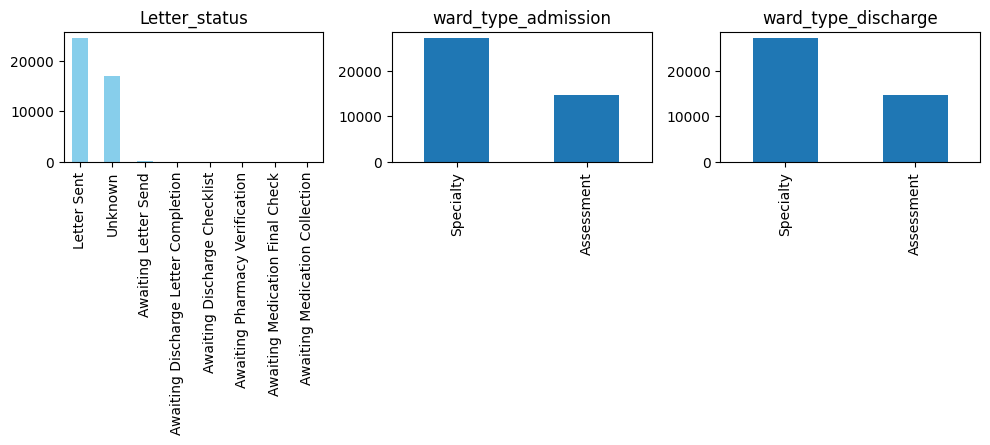

In [24]:
frequency = Full_df['discharge_letter_status'].value_counts()
ward_type_admissiond=Full_df['ward_type_admission'].value_counts()
ward_type_discharge=Full_df['ward_type_admission'].value_counts()

plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
frequency.plot(kind='bar', color='skyblue')
plt.title('Letter_status')
plt.xticks(rotation=90)
plt.xlabel('')
plt.subplot(2,3,2)
ward_type_admissiond.plot(kind='bar')
plt.title('ward_type_admission')
plt.xlabel('')
plt.subplot(2,3,3)
ward_type_discharge.plot(kind='bar')
plt.title('ward_type_discharge')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [25]:
Full_df=Full_df.copy()

In [26]:
##def make_Index(0,0 ):
 ##   return {Unique_values: i for i, Unique_values in enumerate(df[x].unique())}


In [27]:
#print(df.columns.tolist())


In [28]:
#df['general_medical_practice_desc_Index'] = df['general_medical_practice_desc'].map(make_Index(df,'general_medical_practice_desc'))
#df['ward_type_admission_index'] = df['ward_type_admission'].map(make_Index( df,'ward_type_admission' ))
#df['ward_type_discharge_index'] = df['ward_type_discharge'].map(make_Index(df,'ward_type_discharge'))
#df['spell_dominant_proc_description_index'] = df['spell_dominant_proc_description'].map(make_Index(df,'spell_dominant_proc_description'))
#df['discharge_letter_status_index'] = df['discharge_letter_status'].map(make_Index(df,'discharge_letter_status'))
#df['spell_primary_diagnosis_description_index'] = df['spell_primary_diagnosis_description'].map(make_Index(df,'spell_primary_diagnosis_description'))


In [29]:


#word_size= {

   #     'general_medical_practice_desc' : df['general_medical_practice_desc_Index'].nunique(),
     #   'ward_type_admission'    : df['ward_type_admission_index'].nunique(),
      #  'ward_type_discharge'    : df['ward_type_discharge_index'].nunique(),
      #  'spell_dominant_proc_description'    : df['spell_dominant_proc_description_index'].nunique(),
      #  'discharge_letter_status'    : df['discharge_letter_status_index'].nunique(),
    #    'spell_primary_diagnosis_description'    : df['spell_primary_diagnosis_description_index'].nunique()}





In [30]:
#gen_embedding = { feature : np.random.rand(size, 3) for feature , size in word_size.items()}


In [31]:

def corr_emd(df, c, embedding_values):
    return df[c].map(lambda x :embedding_values[x])



In [32]:
#df['general_medical_practice_desc_Imb'] = corr_emd(df,'general_medical_practice_desc_Index' , gen_embedding['general_medical_practice_desc'])
#df['ward_type_admission_Imb'] = corr_emd(df,'ward_type_admission_index' , gen_embedding['ward_type_admission'])
#df['ward_type_discharge_Imb'] = corr_emd(df,'ward_type_discharge_index' , gen_embedding['ward_type_discharge'])
#df['spell_dominant_proc_description_Imb'] = corr_emd(df,'spell_dominant_proc_description_index' , gen_embedding['spell_dominant_proc_description'])
#df['discharge_letter_status_Imb'] = corr_emd(df,'discharge_letter_status_index' , gen_embedding['discharge_letter_status'])
#df['spell_primary_diagnosis_description_Imb'] = corr_emd(df,'spell_primary_diagnosis_description_index' , gen_embedding['spell_primary_diagnosis_description'])


In [33]:
#df.drop(columns=['general_medical_practice_desc','ward_type_admission','ward_type_discharge','spell_dominant_proc_description','discharge_letter_status',
    #             'spell_primary_diagnosis_description','ward_type_discharge_index','spell_dominant_proc_description_index','discharge_letter_status_index','spell_primary_diagnosis_description_index'
       #         ,'ward_type_admission_index','general_medical_practice_desc_Index'],inplace=True)

In [34]:
#df.head()

https://learning.oreilly.com/library/view/feature-engineering-for/9781491953235/ch03.html#chap-basic-text

In [35]:
#dfcorr=df[['elective_admission_flag','non_elective_admission_flag','emergency_readmission_non_pbr_30','readmission_flag_28_days_emergancy','readmission_flag_30_days_emergancy',
#         'IP_admission','IP_discharge','dementia_diagnosis_flag','comorbidity_acute_myocardial_infarction_flag']].corr()
#dfcorr

In [36]:
#sns.clustermap(
   # dfcorr,
    #annot=True,
    #cmap='coolwarm',
   # figsize=(12 ,10),
   # row_cluster=False,
   # col_cluster=True,
   # center=0,
   # linewidths = 1,
    #linecolor = 'white',
   # cbar_pos=None # to stop legend
  #)
#plt.suptitle('Correlation Matrix')
#plt.tight_layout()
#plt.show()

In [37]:
Full_df.head()

,site_national_code,site_description,site_local_code,Admission_Date,admission_date_dt,discharge_date_dt,specialty_local_code,specialty_spec_code,specialty_spec_desc,ward_code_admission,...,presenting_complaint,acuity_code,inj_or_ail,NEWS2,attend_dis_description,ae_unplanned_attendance,location,ID,Deprivation Decile,spell_length_of_stay_hours
0,RRF01,LEIGH INFIRMARY,LEI,2023-07-15,15/07/2023 13:57:00,15/07/2023 16:00:00,CREC,104,Colorectal Surgery,GAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49591,3,3
1,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-07-05,05/07/2023 08:37:00,05/07/2023 10:08:00,TO,110,Trauma & Orthopaedics,OAU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25760,10,2
2,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 11:45:00,08/06/2023 12:50:00,GS,100,General Surgery,SAEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159753,3,1
3,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-06-08,08/06/2023 07:13:00,08/06/2023 17:35:00,BS,103,Breast Surgery,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76679,4,10
4,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 08:29:00,08/06/2023 15:34:00,GA,301,Gastroenterology,ENDO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2617,9,7


In [38]:
Full_df['covid19_diagnosis_flag'].value_counts()

,count
covid19_diagnosis_flag,
0,41695
1.0,151


In [39]:
Full_df[['general_medical_practice_desc','ward_type_admission','ward_type_discharge','spell_primary_diagnosis_description','spell_dominant_proc_description','discharge_letter_status']].head()

,general_medical_practice_desc,ward_type_admission,ward_type_discharge,spell_primary_diagnosis_description,spell_dominant_proc_description,discharge_letter_status
0,BROOKMILL MEDICAL CENTRE,Specialty,Specialty,Diverticular disease of large intestine withou...,Record not grouped,Unknown
1,THE HOLLIES FAMILY SURGERY,Specialty,Specialty,Infection and inflammatory reaction due to int...,ASPIRATION OF JOINT,Letter Sent
2,BRYN STREET SURGERY,Specialty,Specialty,Acute peritonitis,Record not grouped,Unknown
3,BRYN STREET SURGERY,Specialty,Specialty,Malignant neoplasm: Upper-outer quadrant of br...,RE-EXCISION OF BREAST MARGINS,Letter Sent
4,SAXENA L,Specialty,Specialty,Barrett oesophagus,FIBREOPTIC ENDOSCOPIC EXAMINATION OF UPPER GAS...,Unknown


In [40]:
Full_df.columns

Index(['site_national_code', 'site_description', 'site_local_code',
       'Admission_Date', 'admission_date_dt', 'discharge_date_dt',
       'specialty_local_code', 'specialty_spec_code', 'specialty_spec_desc',
       'ward_code_admission', 'ward_name_admission', 'ward_code_discharge',
       'ward_name_discharge', 'date_of_birth_dt', 'date_of_death_dt',
       'ethnic_origin_description', 'duration_elective_wait',
       'patient_age_on_admission', 'patient_age_on_discharge',
       'spell_episode_los', 'discharge_delay_reason_national_code',
       'discharge_delay_reason_description', 'spell_dominant_proc',
       'spell_primary_diagnosis', 'spell_secondary_diagnosis',
       'specialty_division', 'specialty_directorate', 'hrg_group',
       'hrg_sub_group', 'delayed_discharges_flag',
       'delayed_discharges_no_of_days', 'readmission_flag_28_days',
       'readmission_flag_30_days', 'social_worker_date_time_referred',
       'discharge_letter_sent', 'discharge_letter_sent_in_24h

In [41]:
Full_df.head()

,site_national_code,site_description,site_local_code,Admission_Date,admission_date_dt,discharge_date_dt,specialty_local_code,specialty_spec_code,specialty_spec_desc,ward_code_admission,...,presenting_complaint,acuity_code,inj_or_ail,NEWS2,attend_dis_description,ae_unplanned_attendance,location,ID,Deprivation Decile,spell_length_of_stay_hours
0,RRF01,LEIGH INFIRMARY,LEI,2023-07-15,15/07/2023 13:57:00,15/07/2023 16:00:00,CREC,104,Colorectal Surgery,GAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49591,3,3
1,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-07-05,05/07/2023 08:37:00,05/07/2023 10:08:00,TO,110,Trauma & Orthopaedics,OAU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25760,10,2
2,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 11:45:00,08/06/2023 12:50:00,GS,100,General Surgery,SAEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159753,3,1
3,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-06-08,08/06/2023 07:13:00,08/06/2023 17:35:00,BS,103,Breast Surgery,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76679,4,10
4,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 08:29:00,08/06/2023 15:34:00,GA,301,Gastroenterology,ENDO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2617,9,7


In [42]:
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.8 MB/s eta 0:00:00


In [43]:

from category_encoders.cat_boost import CatBoostEncoder

# ===============================
# 2) Define categorical columns + target
# ===============================
cat_cols = [
    'general_medical_practice_desc',
    'ward_type_admission',
    'ward_type_discharge',
    'spell_primary_diagnosis_description',
    'spell_dominant_proc_description',
    'discharge_letter_status'
]

target = 'spell_length_of_stay_hours'

# ===============================
# 3) Separate X and y
# ===============================
X = Full_df.drop(columns=[target]).copy()
y = Full_df[target].copy()

#  Handle datetime safely

if 'discharge_created_datetime_dt' in X.columns:
    X['discharge_created_datetime_dt'] = pd.to_datetime(
        X['discharge_created_datetime_dt'], errors='coerce'
    )
    X['discharge_created_datetime'] = X['discharge_created_datetime_dt'].astype('int64') // 1e9
    X = X.drop(columns=['discharge_created_datetime_dt'])

# encode all categorical columns

encoder = CatBoostEncoder(cols=cat_cols)

X_encoded = encoder.fit_transform(X, y)
# Add target back to final datafraame

final_df = X_encoded.copy()
final_df[target] = y

# Save to CSV
final_df.to_csv("final_catboost_encoded_dataset.csv")

print("✅ Done! File saved as: final_catboost_encoded_dataset.csv")
print("Final shape:", final_df.shape)


/tmp/ipython-input-2828594273.py:27: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  X['discharge_created_datetime_dt'] = pd.to_datetime(


✅ Done! File saved as: final_catboost_encoded_dataset.csv
Final shape: (41846, 99)


In [44]:
final_df.head()

,site_national_code,site_description,site_local_code,Admission_Date,admission_date_dt,discharge_date_dt,specialty_local_code,specialty_spec_code,specialty_spec_desc,ward_code_admission,...,acuity_code,inj_or_ail,NEWS2,attend_dis_description,ae_unplanned_attendance,location,ID,Deprivation Decile,discharge_created_datetime,spell_length_of_stay_hours
0,RRF01,LEIGH INFIRMARY,LEI,2023-07-15,15/07/2023 13:57:00,15/07/2023 16:00:00,CREC,104,Colorectal Surgery,GAST,...,NaN,NaN,NaN,NaN,NaN,NaN,49591,3,1.689496e+09,3
1,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-07-05,05/07/2023 08:37:00,05/07/2023 10:08:00,TO,110,Trauma & Orthopaedics,OAU,...,NaN,NaN,NaN,NaN,NaN,NaN,25760,10,1.688552e+09,2
2,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 11:45:00,08/06/2023 12:50:00,GS,100,General Surgery,SAEC,...,NaN,NaN,NaN,NaN,NaN,NaN,159753,3,1.686229e+09,1
3,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-06-08,08/06/2023 07:13:00,08/06/2023 17:35:00,BS,103,Breast Surgery,D,...,NaN,NaN,NaN,NaN,NaN,NaN,76679,4,1.686246e+09,10
4,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 08:29:00,08/06/2023 15:34:00,GA,301,Gastroenterology,ENDO,...,NaN,NaN,NaN,NaN,NaN,NaN,2617,9,1.686238e+09,7


In [45]:
final_df.columns

Index(['site_national_code', 'site_description', 'site_local_code',
       'Admission_Date', 'admission_date_dt', 'discharge_date_dt',
       'specialty_local_code', 'specialty_spec_code', 'specialty_spec_desc',
       'ward_code_admission', 'ward_name_admission', 'ward_code_discharge',
       'ward_name_discharge', 'date_of_birth_dt', 'date_of_death_dt',
       'ethnic_origin_description', 'duration_elective_wait',
       'patient_age_on_admission', 'patient_age_on_discharge',
       'spell_episode_los', 'discharge_delay_reason_national_code',
       'discharge_delay_reason_description', 'spell_dominant_proc',
       'spell_primary_diagnosis', 'spell_secondary_diagnosis',
       'specialty_division', 'specialty_directorate', 'hrg_group',
       'hrg_sub_group', 'delayed_discharges_flag',
       'delayed_discharges_no_of_days', 'readmission_flag_28_days',
       'readmission_flag_30_days', 'social_worker_date_time_referred',
       'discharge_letter_sent', 'discharge_letter_sent_in_24h

In [46]:
final_df=final_df[['elective_admission_flag',
 'non_elective_admission_flag',
 'emergency_readmission_non_pbr_30',
 'readmission_flag_28_days_emergancy',
 'readmission_flag_30_days_emergancy',
 'general_medical_practice_desc',
 'IP_admission',
 'IP_discharge',
 'ward_type_admission',
 'ward_type_discharge',
 'spell_primary_diagnosis_description',
 'spell_dominant_proc_description',
 'dementia_diagnosis_flag',
 'discharge_letter_status',
 'covid19_diagnosis_flag',
 'comorbidity_score',
 'discharge_created_datetime',
 'comorbidity_acute_myocardial_infarction_flag',
 'spell_length_of_stay_hours']]

In [47]:
final_df.columns.to_list()

['elective_admission_flag',
 'non_elective_admission_flag',
 'emergency_readmission_non_pbr_30',
 'readmission_flag_28_days_emergancy',
 'readmission_flag_30_days_emergancy',
 'general_medical_practice_desc',
 'IP_admission',
 'IP_discharge',
 'ward_type_admission',
 'ward_type_discharge',
 'spell_primary_diagnosis_description',
 'spell_dominant_proc_description',
 'dementia_diagnosis_flag',
 'discharge_letter_status',
 'covid19_diagnosis_flag',
 'comorbidity_score',
 'discharge_created_datetime',
 'comorbidity_acute_myocardial_infarction_flag',
 'spell_length_of_stay_hours']

In [48]:
# Save the DataFrame to an Excel file
final_df.to_csv('/content/merge_Xiaomei_col_40_60.csv', index=False)

# Trigger the download of the file
from google.colab import files
files.download('/content/merge_Xiaomei_col_40_60.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>